# AWS Re:Invent  Autogluon Workshop
### This workshop will demonstrate a machine learning problem solved by autogluon.
* The problem we want to solve in this tutorial is Shopee clothes labeling. The problem is exctracted from [this kaggle competition](https://www.kaggle.com/competitions/shopee-product-matching/leaderboard)
* Use the documentation of autogluon and the different tutorials [here](https://auto.gluon.ai/stable/index.html).

In [1]:
# installation of needed librairies.
#!pip3 install -U pip
#!pip3 install -U setuptools wheel

# Install the proper version of PyTorch following https://pytorch.org/get-started/locally/
#!pip3 install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchtext==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu113
#!pip3 install "gluoncv>=0.5.0,<0.9.0"
#!pip3 install "mxnet<2.0.0"
!pip3 install autogluon

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.12+cpu (from versions: 0.3.0.post4, 0.3.1, 0.4.0, 0.4.1, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.2.0+cpu, 1.3.0, 1.3.0+cpu, 1.3.1, 1.3.1+cpu, 1.4.0, 1.4.0+cpu, 1.5.0, 1.5.0+cpu, 1.5.1, 1.5.1+cpu, 1.6.0, 1.6.0+cpu, 1.7.0, 1.7.0+cpu, 1.7.1, 1.7.1+cpu, 1.8.0, 1.8.0+cpu, 1.8.1, 1.8.1+cpu, 1.9.0, 1.9.0+cpu, 1.9.1, 1.9.1+cpu, 1.10.0, 1.10.0+cpu, 1.10.1, 1.10.1+cpu, 1.10.2, 1.10.2+cpu)
ERROR: No matching distribution found for torch==1.12+cpu
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached gluoncv-0.8.0-py2.py3-none-any.whl (810 kB)
  Attempting uninstall: gluoncv
    Found existing installation: gluoncv 0.10.4.post4
    Uninstalling gluoncv-0.10.4.post4:
      Successfully uninstalled gluoncv-0.10.4.post4
ERROR: p

In [2]:
#Check if a GPU is available.
import torch
torch.cuda.is_available()

True

In [3]:
print(torch.version.cuda)

10.2


In [4]:
# import autogluon tools.
import autogluon
import autogluon.core as ag
from autogluon.vision import ImageDataset, ImagePredictor

import pandas as pd

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.10.1+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [5]:
# Import dataset. It's already label and split by autogluon into training and testing datasets.
data_location = 'https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip'
train_dataset, _, test_dataset = ImageDataset.from_folders(data_location)

data/
├── test/
└── train/


In [6]:
# The dataset is a dataframe with the location of the image and the label.
print('train #', len(train_dataset), 'test #', len(test_dataset))
train_dataset.head()

train # 800 test # 80


image  label
0  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
1  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
2  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
3  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
4  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0

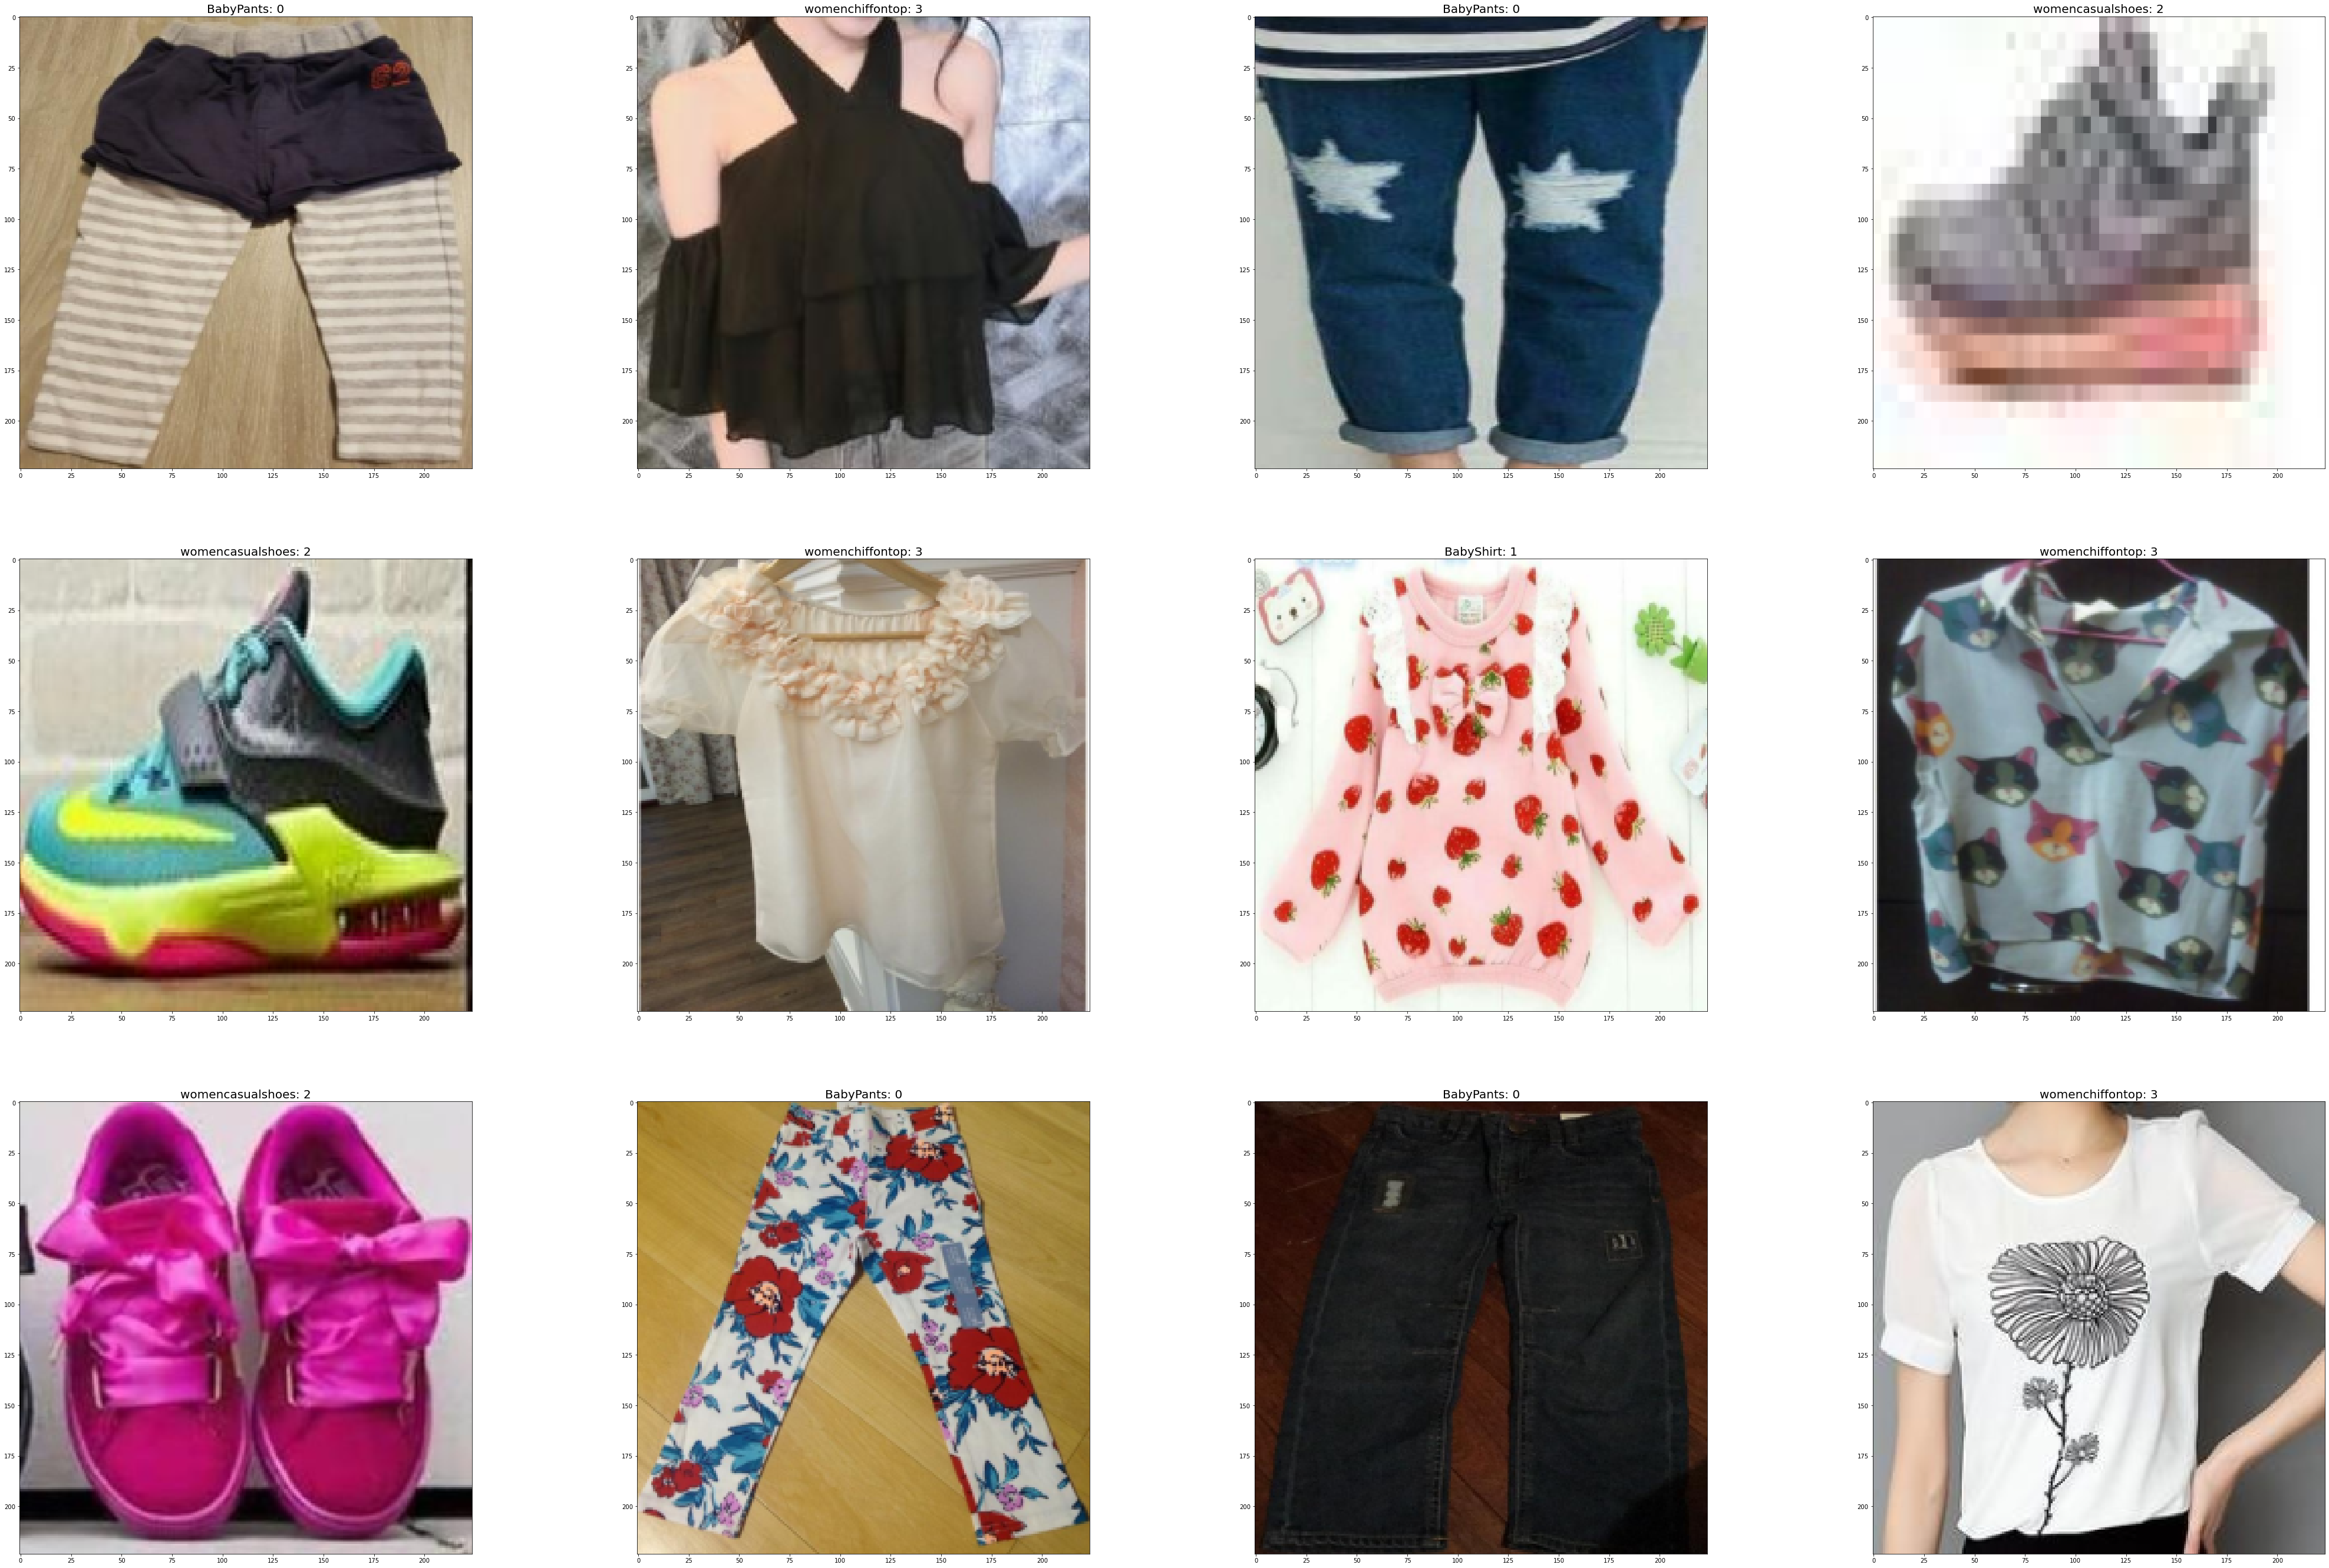

In [7]:
# We use the show images function to see the images from the dataset. it's plotted randomly.
train_dataset.sample(frac=1).iloc[:12].show_images()

### Labels
* 0 Baby Pants
* 1 Baby Shirt
* 2 Women Shoes
* 3 Women Top

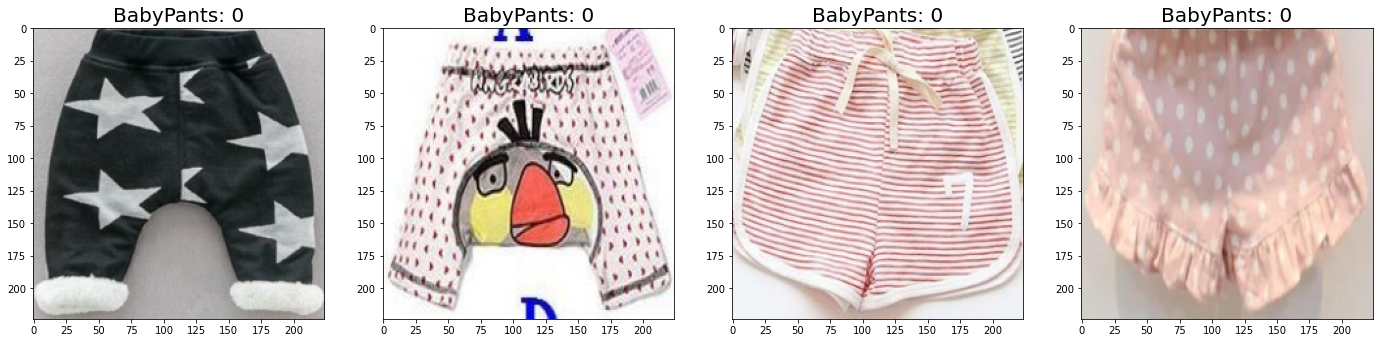

In [8]:
# Label=0 are Baby Pants.
train_dataset.loc[train_dataset['label']==0].iloc[:4].show_images()

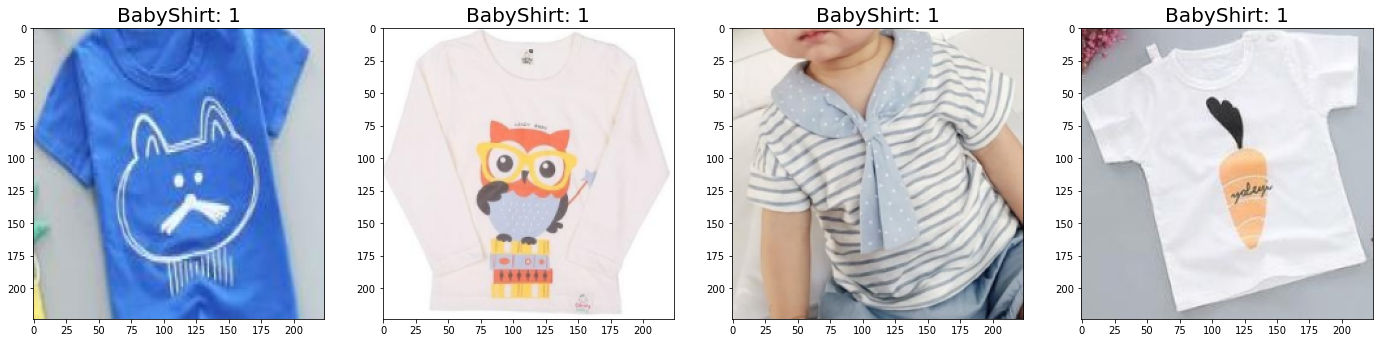

In [9]:
# Label=1 are Baby Shirt
train_dataset.loc[train_dataset['label']==1].iloc[:4].show_images()

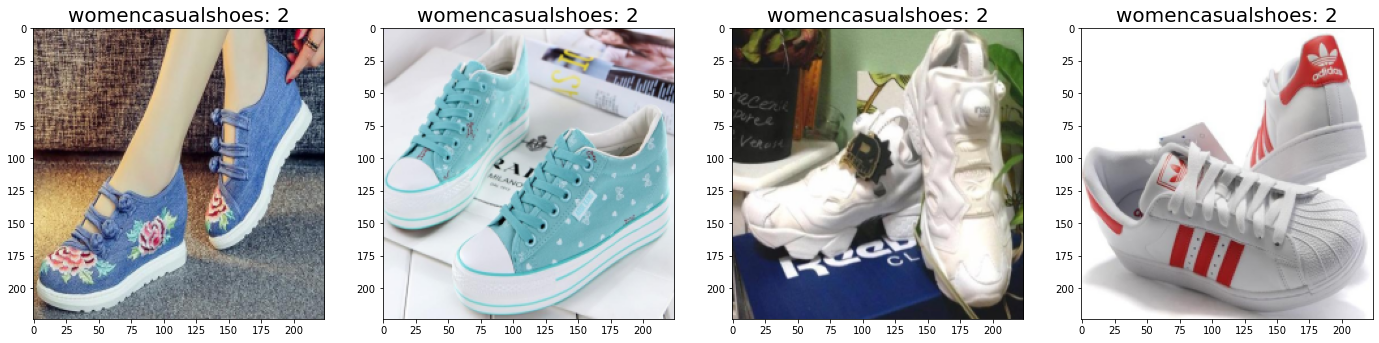

In [10]:
# Label=2 are Women shoes
train_dataset.loc[train_dataset['label']==2].iloc[:4].show_images()

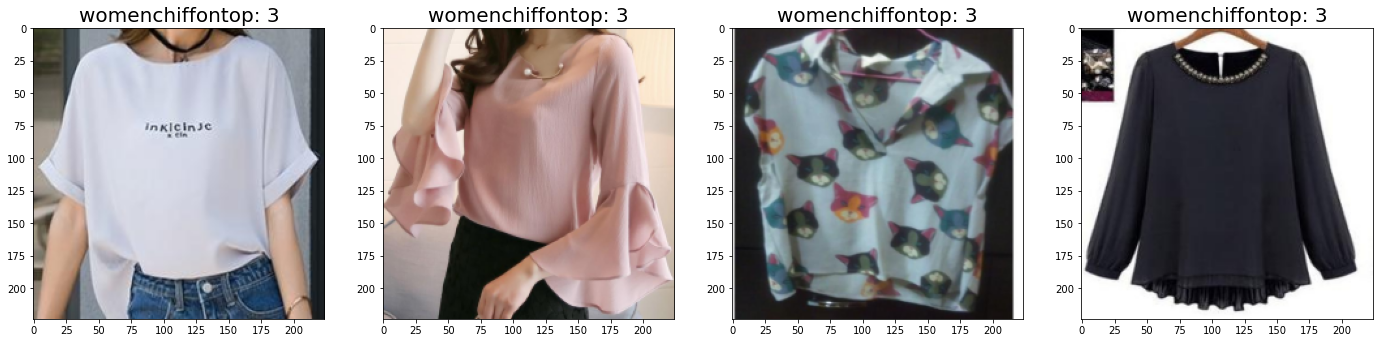

In [11]:
# Label=3 are women top
train_dataset.loc[train_dataset['label']==3].iloc[:4].show_images()

### Let's use the default config and take a time limit of 5 min.

In [12]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(train_dataset, time_limit=5*60) 

Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.seed       42 != 740
root.train.batch_size 32 != 16
root.train.early_stop_patience -1 != 10
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 15
root.img_cls.model   resnet101 != resnet50
}
Saved config to /home/ec2-user/SageMaker/ddec8a29/.trial_0/config.yaml
Model resnet50 created, param count:                                         23516228
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.293056
[Epoch 0] speed: 87 samples/sec	time cost: 8.073465
[Epoch 0] validation: top1=0.387500 top5=1.000000
[Epoch 0] Current best top-1: 0.387500 vs previous -inf, saved to /home/ec2

In [ ]:
# interaction

In [13]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.831, val acc: 0.925


In [14]:
image_index = 0
image_path = test_dataset.iloc[image_index]['image']
result = predictor.predict(image_path)
print(result)

0    0
Name: label, dtype: int64


In [50]:
predictor.evaluate(test_dataset)

{'top1': 0.8625, 'top5': 1.0}

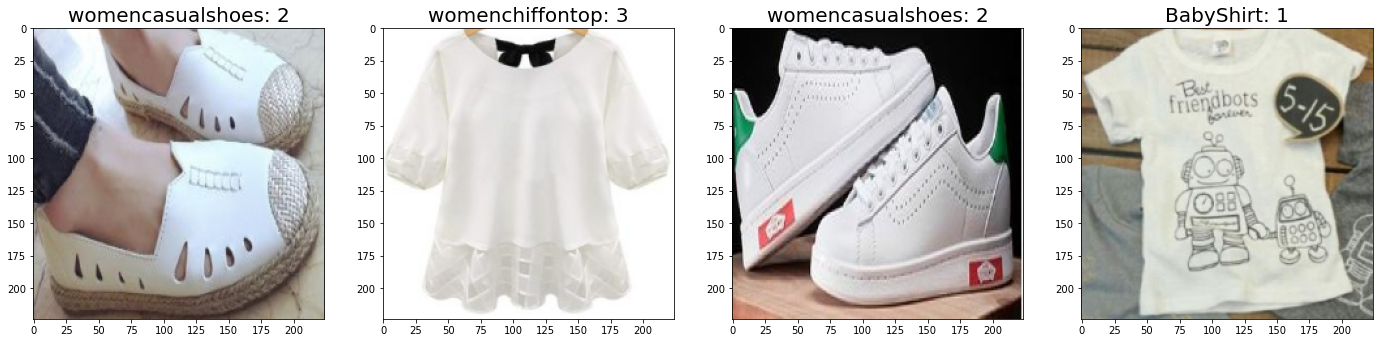

In [15]:
test_sample = test_dataset.sample(frac=1).iloc[:4]
test_sample.show_images()

In [16]:
bulk_result = predictor.predict(test_sample)

In [17]:
bulk_result

46    2
23    1
42    2
69    3
Name: label, dtype: int64

In [18]:
test_sample.label

46    2
23    1
42    2
69    3
Name: label, dtype: int64

## Let's try specific models

In [19]:
ImagePredictor.list_models()

('resnet18_v1',
 'resnet34_v1',
 'resnet50_v1',
 'resnet101_v1',
 'resnet152_v1',
 'resnet18_v2',
 'resnet34_v2',
 'resnet50_v2',
 'resnet101_v2',
 'resnet152_v2',
 'resnest14',
 'resnest26',
 'resnest50',
 'resnest101',
 'resnest200',
 'resnest269',
 'se_resnet18_v1',
 'se_resnet34_v1',
 'se_resnet50_v1',
 'se_resnet101_v1',
 'se_resnet152_v1',
 'se_resnet18_v2',
 'se_resnet34_v2',
 'se_resnet50_v2',
 'se_resnet101_v2',
 'se_resnet152_v2',
 'vgg11',
 'vgg13',
 'vgg16',
 'vgg19',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'alexnet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'squeezenet1.0',
 'squeezenet1.1',
 'googlenet',
 'inceptionv3',
 'xception',
 'xception71',
 'mobilenet1.0',
 'mobilenet0.75',
 'mobilenet0.5',
 'mobilenet0.25',
 'mobilenetv2_1.0',
 'mobilenetv2_0.75',
 'mobilenetv2_0.5',
 'mobilenetv2_0.25',
 'mobilenetv3_large',
 'mobilenetv3_small',
 'cifar_resnet20_v1',
 'cifar_resnet56_v1',
 'cifar_resnet110_v1',
 'cifar_resnet20_v2',
 'cifar_

In [33]:
model = ag.Categorical('resnet18_v1b', 'mobilenetv3_small')

In [34]:
batch_size = 16
lr = ag.Categorical(1e-2, 1e-3)

ImagePredictor sets accuracy as default eval_metric for classification problems.
Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.img_cls.model   resnet50_v1 != resnet18_v1b
root.train.lr        0.1 != 0.01
root.train.num_training_samples 1281167 != -1
root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
root.train.rec_val_idx ~/.mxnet/datasets/imagenet/rec/val.idx != auto
root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
root.train.batch_size 128 != 16
root.train.early_stop_patience -1 != 10
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
root.train.rec_val   ~/.mxnet/datasets/imagenet/rec/val.rec != auto
root.valid.batch_size 128 != 16
}
Saved config to /home/ec2-user/SageMaker/56b6a883/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.359722
[Epoch 0] speed: 15 samples/sec	time cost: 45.671239
[Epoch 0] validation: top1=0.60

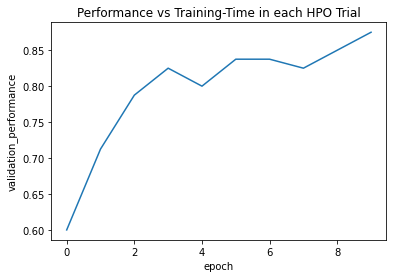

Finished, total runtime is 498.23 s
{ 'best_config': { 'estimator': <class 'gluoncv.auto.estimators.image_classification.image_classification.ImageClassificationEstimator'>,
                   'gpus': [0],
                   'img_cls': { 'batch_norm': False,
                                'last_gamma': False,
                                'model': 'resnet18_v1b',
                                'use_gn': False,
                                'use_pretrained': True,
                                'use_se': False},
                   'train': { 'batch_size': 16,
                              'crop_ratio': 0.875,
                              'data_dir': 'auto',
                              'dtype': 'float32',
                              'early_stop_baseline': -inf,
                              'early_stop_max_value': inf,
                              'early_stop_min_delta': 0.001,
                              'early_stop_patience': 10,
                              'epochs': 1

Top-1 val acc: 0.875


In [45]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr, 'epochs': 10}
predictor = ImagePredictor()
predictor.fit(train_dataset,
              time_limit=10*60, 
              hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs={'num_trials': 2}
             )
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [46]:
results = predictor.evaluate(test_dataset)
print('Test acc on hold-out data:', results)

Test acc on hold-out data: {'top1': 0.8625, 'top5': 1.0}


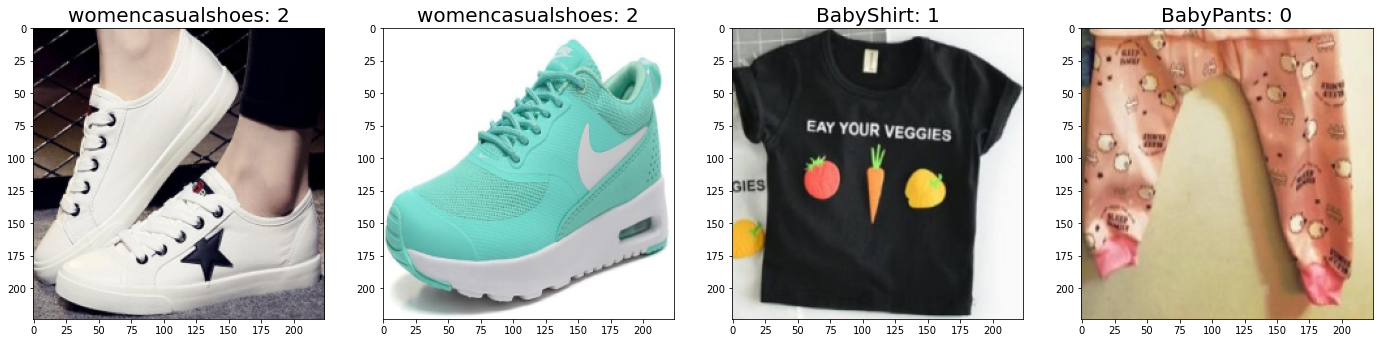

In [47]:
test_sample = test_dataset.sample(frac=1).iloc[:4]
test_sample.show_images()

In [48]:
bulk_result = predictor.predict(test_sample)
bulk_result 
# label name

38    1
9     0
54    2
57    2
Name: label, dtype: int64

In [49]:
test_sample.label

38    1
9     0
54    2
57    2
Name: label, dtype: int64

### Let's see the result with more training time

In [39]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr}

predictor = ImagePredictor()
predictor.fit(train_dataset,
              time_limit=1*60*60,
              hyperparameters=hyperparameters
             )
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

ImagePredictor sets accuracy as default eval_metric for classification problems.
Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet50_v1 != resnet18_v1b
root.train.lr        0.1 != 0.01
root.train.num_training_samples 1281167 != -1
root.train.rec_train_idx ~/.mxnet/datasets/imagenet/rec/train.idx != auto
root.train.rec_val_idx ~/.mxnet/datasets/imagenet/rec/val.idx != auto
root.train.data_dir  ~/.mxnet/datasets/imagenet != auto
root.train.batch_size 128 != 16
root.train.early_stop_patience -1 != 10
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_max_value 1.0 != inf
root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
root.train.rec_val   ~/.mxnet/datasets/imagenet/rec/val.rec != auto
root.train.epochs    10 != 15
root.valid.ba

RuntimeError: Unexpected error happened during fit: { 'args': "{'img_cls': {'model': 'resnet18_v1b', 'use_pretrained': True, "
          "'use_gn': False, 'batch_norm': False, 'use_se': False, "
          "'last_gamma': False}, 'train': {'pretrained_base': True, "
          "'batch_size': 16, 'epochs': 15, 'lr': 0.01, 'lr_decay': 0.1, "
          "'lr_decay_period': 0, 'lr_decay_epoch': '40, 60', 'lr_mode': "
          "'step', 'warmup_lr': 0.0, 'warmup_epochs': 0, "
          "'num_training_samples': -1, 'num_workers': 4, 'wd': 0.0001, "
          "'momentum': 0.9, 'teacher': None, 'hard_weight': 0.5, 'dtype': "
          "'float32', 'input_size': 224, 'crop_ratio': 0.875, 'use_rec': "
          "False, 'rec_train': 'auto', 'rec_train_idx': 'auto', 'rec_val': "
          "'auto', 'rec_val_idx': 'auto', 'data_dir': 'auto', 'mixup': False, "
          "'no_wd': False, 'label_smoothing': False, 'temperature': 20, "
          "'resume_epoch': 0, 'mixup_alpha': 0.2, 'mixup_off_epoch': 0, "
          "'log_interval': 50, 'mode': '', 'start_epoch': 0, "
          "'transfer_lr_mult': 0.01, 'output_lr_mult': 0.1, "
          "'early_stop_patience': 10, 'early_stop_min_delta': 0.001, "
          "'early_stop_baseline': -inf, 'early_stop_max_value': inf}, 'valid': "
          "{'batch_size': 16, 'num_workers': 4}, 'gpus': [0]}",
  'time': 23.848015785217285,
  'traceback': 'Traceback (most recent call last):\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/auto/tasks/image_classification.py", '
               'line 195, in _train_image_classification\n'
               '    result = estimator.fit(train_data=train_data, '
               'val_data=val_data, time_limit=wall_clock_tick-tic)\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/auto/estimators/base_estimator.py", '
               'line 175, in fit\n'
               '    ret = self._fit(train_data, val_data, '
               'time_limit=time_limit) if not resume else \\\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/auto/estimators/image_classification/image_classification.py", '
               'line 91, in _fit\n'
               '    return self._resume_fit(train_data, val_data, '
               'time_limit=time_limit)\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/auto/estimators/image_classification/image_classification.py", '
               'line 120, in _resume_fit\n'
               '    return self._train_loop(train_loader, val_loader, '
               'time_limit=time_limit)\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/gluoncv/auto/estimators/image_classification/image_classification.py", '
               'line 230, in _train_loop\n'
               '    train_metric.update(label, outputs)\n'
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/mxnet/metric.py", '
               'line 493, in update\n'
               "    pred_label = pred_label.asnumpy().astype('int32')\n"
               '  File '
               '"/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/mxnet/ndarray/ndarray.py", '
               'line 2566, in asnumpy\n'
               '    ctypes.c_size_t(data.size)))\n'
               'KeyboardInterrupt\n',
  'train_acc': -1,
  'valid_acc': -1}

In [ ]:
results = predictor.evaluate(test_dataset)
print('Test acc on hold-out data:', results)

In [ ]:
test_sample = test_dataset.sample(frac=1).iloc[:8]
test_sample.show_images()

In [ ]:
bulk_result = predictor.predict(test_sample)
bulk_result

In [ ]:
test_sample.label